<a href="https://colab.research.google.com/github/team0243/DWDM21/blob/main/Data103(Chapter3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd #ทำงานกับข้อมูลลักษณะ ตาราง

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from google.colab import drive # เชื่อม google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os #จัดการไฟล์และ path

In [6]:
path = '/content/drive/My Drive/DWDM2021_DATA'

In [7]:
data_cases = pd.read_csv(os.path.join(path,'confirmed-cases.csv'))
data_cases

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1.0,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2.0,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3.0,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4.0,22/1/2020,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5.0,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
543301,543302.0,28/7/2021,27/7/2021,ชาย,39.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543302,543303.0,28/7/2021,27/7/2021,ชาย,37.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543303,543304.0,28/7/2021,27/7/2021,ชาย,28.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543304,543305.0,28/7/2021,27/7/2021,ชาย,26.0,ปี,NaN,ปัตตานี,ทัณฑสถาน/เรือนจำ,ปัตตานี,NaN


***Meta Data (Data อธิบาย Data)***

#ชี้ข้อมูลในตาราง

### ชี้แบบธรรมดาใช้[ชื่อ][colum]

In [8]:
data_cases[ 'risk' ]

0         คนต่างชาติเดินทางมาจากต่างประเทศ
1         คนต่างชาติเดินทางมาจากต่างประเทศ
2         คนต่างชาติเดินทางมาจากต่างประเทศ
3         คนต่างชาติเดินทางมาจากต่างประเทศ
4         คนต่างชาติเดินทางมาจากต่างประเทศ
                        ...               
543301                    ทัณฑสถาน/เรือนจำ
543302                    ทัณฑสถาน/เรือนจำ
543303                    ทัณฑสถาน/เรือนจำ
543304                    ทัณฑสถาน/เรือนจำ
543305                                 NaN
Name: risk, Length: 543306, dtype: object

In [9]:
data_cases[ 'risk' ][784]

'สนามมวย'

### ชี้แบบ .iloc[](มองข้อมูลเป็น matrix)

In [10]:
data_cases.iloc[678,8]

'สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้'

In [11]:
data_cases.iloc[-10:,[3,4,8]]

,sex,age,risk
543296,ชาย,47.0,ทัณฑสถาน/เรือนจำ
543297,ชาย,38.0,ทัณฑสถาน/เรือนจำ
543298,ชาย,39.0,ทัณฑสถาน/เรือนจำ
543299,ชาย,40.0,ทัณฑสถาน/เรือนจำ
543300,ชาย,38.0,ทัณฑสถาน/เรือนจำ
543301,ชาย,39.0,ทัณฑสถาน/เรือนจำ
543302,ชาย,37.0,ทัณฑสถาน/เรือนจำ
543303,ชาย,28.0,ทัณฑสถาน/เรือนจำ
543304,ชาย,26.0,ทัณฑสถาน/เรือนจำ
543305,NaN,NaN,NaN


In [12]:
data_cases.iloc[-10:,3:4:8]

,sex
543296,ชาย
543297,ชาย
543298,ชาย
543299,ชาย
543300,ชาย
543301,ชาย
543302,ชาย
543303,ชาย
543304,ชาย
543305,NaN


In [13]:
data_cases.describe()

,No.,age
count,543305.000000,491048.000000
mean,271653.000000,35.519252
std,156838.788338,16.197363
min,1.000000,1.000000
25%,135827.000000,25.000000
50%,271653.000000,34.000000
75%,407479.000000,46.000000
max,543305.000000,108.000000


{'boxes': [<matplotlib.lines.Line2D at 0x7f80b480da10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f80b4819ad0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f80b4820b10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f80b48205d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f80b4819050>,
  <matplotlib.lines.Line2D at 0x7f80b4819590>]}

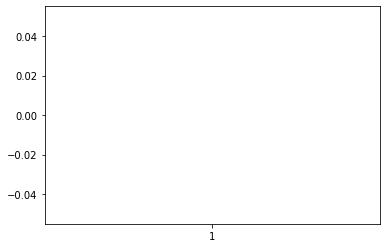

In [14]:
from matplotlib import pyplot as plt
plt.boxplot(data_cases['age']) # age มีข้อมูลที่ missing ทำให้ plot กราฟไม่ได้

###Missing Values

*NaN = Not a Number
*Null 
*Na = Not Available

In [15]:
data_cases.isnull()

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,False,False,True,False,False,False,False,False,False,False,True
1,False,False,True,False,False,False,False,False,False,False,True
2,False,False,True,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,True
4,False,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
543301,False,False,False,False,False,False,True,False,False,False,True
543302,False,False,False,False,False,False,True,False,False,False,True
543303,False,False,False,False,False,False,True,False,False,False,True
543304,False,False,False,False,False,False,True,False,False,False,True


In [16]:
data_cases

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1.0,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2.0,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3.0,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4.0,22/1/2020,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5.0,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
543301,543302.0,28/7/2021,27/7/2021,ชาย,39.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543302,543303.0,28/7/2021,27/7/2021,ชาย,37.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543303,543304.0,28/7/2021,27/7/2021,ชาย,28.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543304,543305.0,28/7/2021,27/7/2021,ชาย,26.0,ปี,NaN,ปัตตานี,ทัณฑสถาน/เรือนจำ,ปัตตานี,NaN


In [17]:
data_cases.isnull().any() #.any ช่วยสรุปข้อมูลให้เป็น column

No.                      True
announce_date            True
Notified date            True
sex                      True
age                      True
Unit                     True
nationality              True
province_of_isolation    True
risk                     True
province_of_onset        True
district_of_onset        True
dtype: bool

###Handling Missing Value1 (ลบค่าลบค่า missing ออกไป)

{'boxes': [<matplotlib.lines.Line2D at 0x7f80b4369f90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f80b4362ed0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f80b42fdf10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f80b42fd9d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f80b4362450>,
  <matplotlib.lines.Line2D at 0x7f80b4362990>]}

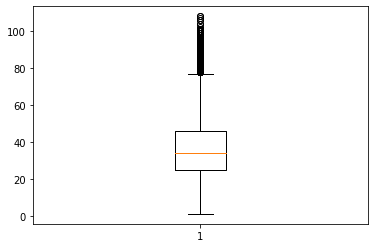

In [18]:
plt.boxplot(data_cases['age'].dropna()) #.dropna ช่วยลบค่า missing ออก

In [19]:
data_cases.dropna()

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
47,48.0,6/3/2020,4/3/2020,ชาย,43.0,ปี,United Kingdom,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,คลองตัน
124,125.0,6/3/2021,5/3/2021,หญิง,55.0,ปี,Thailand,ปทุมธานี,Cluster ตลาดพรพัฒน์,ปทุมธานี,ธัญบุรี
161,162.0,17/3/2020,21/3/2020,ชาย,14.0,ปี,Thailand,สุราษฎร์ธานี,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สุราษฎร์ธานี,เมือง
181,182.0,18/3/2020,15/3/2020,ชาย,33.0,ปี,Thailand,ขอนแก่น,สนามมวย,ขอนแก่น,เมือง
186,187.0,18/3/2020,16/3/2020,ชาย,36.0,ปี,Thailand,ร้อยเอ็ด,สนามมวย,ร้อยเอ็ด,เชียงขวัญ
...,...,...,...,...,...,...,...,...,...,...,...
543098,543099.0,28/7/2021,27/7/2021,หญิง,63.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,นครปฐม,พุทธมณฑล
543099,543100.0,28/7/2021,27/7/2021,ชาย,67.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,หนองแขม
543100,543101.0,28/7/2021,27/7/2021,หญิง,68.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,ดุสิต
543101,543102.0,28/7/2021,27/7/2021,ชาย,73.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,ราษฎร์บูรณะ


In [20]:
data_cases.dropna().shape # ดูว่าข้อมูลมีทั้งหมดเท่าไร

(385643, 11)

In [21]:
data_cases.dropna().shape[0]

385643

Quiz 3 ให้หาว่าการทำ dropna() ทำให้ข้อมูลหายไปกี่ %


```
size before drop = 1000
size after drop = 10 
we lost 99% of data
```

In [22]:
removed = data_cases.shape[0] - data_cases.dropna().shape[0]

In [23]:
print(f'size before drop = {data_cases.shape[0]}')
print(f'size after drop = {data_cases.dropna().shape[0]}')
print(f'we lost {100*(removed/data_cases.shape[0])}% of data')

size before drop = 543306
size after drop = 385643
we lost 29.019189922437818% of data


### Handling Missing Value 1.5 (ลบค่า missing เฉพาะใน column ที่เราสนใจ)

In [24]:
data_cases_nomissingAge = data_cases.dropna(subset=['age'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f80b37f3310>],
 'caps': [<matplotlib.lines.Line2D at 0x7f80b37f8390>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f80b38003d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f80b37f8e50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f80b37f38d0>,
  <matplotlib.lines.Line2D at 0x7f80b37f3e10>]}

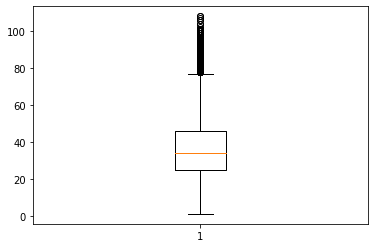

In [25]:
plt.boxplot(data_cases_nomissingAge['age'])

Quiz 3.1 ให้หาว่าการทำ dropna() แบบเลือก drop เฉพาะ column ที่เราสนใจ (age) ทำให้ข้อมูลหายไปกี่ %

In [26]:
removed = data_cases_nomissingAge.shape[0] - data_cases_nomissingAge.dropna().shape[0]

In [27]:
print(f'size before drop = {data_cases_nomissingAge.shape[0]}')
print(f'size after drop = {data_cases_nomissingAge.dropna().shape[0]}')
print(f'we lost {100*(removed/data_cases_nomissingAge.shape[0])}% of data')

size before drop = 491048
size after drop = 385643
we lost 21.465314999755623% of data


## Handling Missing Value 2 (แทนด้วย class ใหม่ (unknown))

In [28]:
data_cases

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1.0,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2.0,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3.0,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4.0,22/1/2020,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5.0,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
543301,543302.0,28/7/2021,27/7/2021,ชาย,39.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543302,543303.0,28/7/2021,27/7/2021,ชาย,37.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543303,543304.0,28/7/2021,27/7/2021,ชาย,28.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543304,543305.0,28/7/2021,27/7/2021,ชาย,26.0,ปี,NaN,ปัตตานี,ทัณฑสถาน/เรือนจำ,ปัตตานี,NaN


In [29]:
data_cases[['risk']] = data_cases[['risk']].fillna('ไม่มีข้อมูล')

In [30]:
set(data_cases['risk'])

{'2.สัมผัสผู้ติดเชื้อ',
 'ACF รองเมือง',
 'ACF สนามกีฬาธูปะเตมีย์',
 'ACF สนามกีฬาไทย-ญี่ปุ่น',
 'ACF สีลม',
 'ACF เคหะหลักสี่',
 'Cluster Icon siam',
 "Cluster Memory 90's กรุงเทพมหานคร",
 'Cluster New Jazz กรุงเทพมหานคร',
 'Cluster The Lounge Salaya',
 'Cluster กรุงเทพมหานคร. คลองเตย',
 'Cluster คลองเตย',
 'Cluster งานมอเตอร์ โชว์',
 'Cluster จนท. สนามบินสุวรรณภูมิ',
 'Cluster จันทบุรี',
 'Cluster จันทบุรี (ชาวกินี )',
 'Cluster จันทบุรี (ชาวกินี)',
 'Cluster ชลบุรี',
 'Cluster ชลบุรี บริษัทไดกิ้น',
 'Cluster ชลบุรี โรงเบียร์ 90',
 'Cluster ตราด',
 'Cluster ตราด ',
 'Cluster ตลาดนนทบุรี',
 'Cluster ตลาดบางพลี',
 'Cluster ตลาดบางแค',
 'Cluster ตลาดบางแค/คลองขวาง',
 'Cluster ตลาดพรพัฒน์',
 'Cluster ตลาดสี่มุมเมือง',
 'Cluster ทัณฑสถานหญิงกลาง',
 'Cluster ทัณฑสถานโรงพยาบาลราชทัณฑ์',
 'Cluster ทันฑสถานบำบัดพิเศษกลาง',
 'Cluster บริษัทศรีสวัสดิ์',
 'Cluster บางแค',
 'Cluster บ่อนพัทยา/ชลบุรี',
 'Cluster บ่อนเทพารักษ์',
 'Cluster บ่อนไก่อ่างทอง',
 'Cluster ปากช่อง',
 'Cluster ผับ Thonglor'

## Handling Missing Value 3 (แทนด้วย class ใหม่ (ค่าที่เหมาะสม))

In [31]:
set(data_cases['Unit'])

{' วัน', ' เดือน', nan, 'ปี', 'วัน', 'เดือน'}

In [32]:
data_cases[['Unit']] = data_cases[['Unit']].fillna('ปี?')

In [33]:
data_cases.isnull().any()

No.                       True
announce_date             True
Notified date             True
sex                       True
age                       True
Unit                     False
nationality               True
province_of_isolation     True
risk                     False
province_of_onset         True
district_of_onset         True
dtype: bool

## Handling Missing Value 4 (แทนด้วยค่ากลาง)

ถ้าเป็นnumeric ใช้ mean

In [34]:
#หาmean
data_cases[['age']].mean()
# เติม mean ลงไปแทนค่า missing

age    35.519252
dtype: float64

In [35]:
data_cases[['age']].dropna().mean()

age    35.519252
dtype: float64

In [36]:
# หา mean
avg_age = data_cases[['age']].mean()
# เติม mean ลงไปแทนค่า missing
data_cases[['age']] = data_cases[['age']].fillna(avg_age)

In [37]:
data_cases.isnull().any()

No.                       True
announce_date             True
Notified date             True
sex                       True
age                      False
Unit                     False
nationality               True
province_of_isolation     True
risk                     False
province_of_onset         True
district_of_onset         True
dtype: bool

In [38]:
data_cases[['age']].mean()

age    35.519252
dtype: float64

ถ้าเป็น nominal (ตัวหนังสือ) จะใช้ mode()

In [39]:
data_cases[['nationality']].mode()

,nationality
0,Thailand


In [40]:
data_cases[['nationality']].mode().iloc[0,0]

'Thailand'

In [41]:
data_cases['nationality'].mode()

0    Thailand
dtype: object

In [42]:
# หา mode
mode_nation = data_cases[['nationality']].mode().iloc[0,0]
# เติม mean ลงไปแทนค่า missing
data_cases[['nationality']] = data_cases[['nationality']].fillna(mode_nation)

ถ้าเป็น ordinal (ตัวหนังสือ) จะใช้ medium()

# เติมด้วยค่าของ column ใกล้เคียง (เดี๋ยวย้อนกลับมา)

In [43]:
data_cases.head(20)

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1.0,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2.0,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3.0,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4.0,22/1/2020,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5.0,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
5,6.0,25/1/2020,NaN,หญิง,33.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
6,7.0,26/1/2020,NaN,หญิง,57.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
7,8.0,26/1/2020,NaN,หญิง,73.0,ปี,China,ประจวบคีรีขันธ์,คนต่างชาติเดินทางมาจากต่างประเทศ,ประจวบคีรีขันธ์,หัวหิน
8,9.0,28/1/2020,NaN,ชาย,63.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
9,10.0,28/1/2020,NaN,หญิง,28.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,นนทบุรี,NaN


## Handling Missing Value 5 (แทนด้วย ค่ากลางของ samples ใน class เดียวกัน)

In [44]:
data_cases2 = pd.read_csv(os.path.join(path,'confirmed-cases.csv'))
data_cases2

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1.0,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2.0,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3.0,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4.0,22/1/2020,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5.0,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
543301,543302.0,28/7/2021,27/7/2021,ชาย,39.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543302,543303.0,28/7/2021,27/7/2021,ชาย,37.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543303,543304.0,28/7/2021,27/7/2021,ชาย,28.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543304,543305.0,28/7/2021,27/7/2021,ชาย,26.0,ปี,NaN,ปัตตานี,ทัณฑสถาน/เรือนจำ,ปัตตานี,NaN


# Select data by values [PD]

การเลือก record สามารถเลือกโดยใช้ ```list ของ boolean```(ความยาวของ list เท่ากับ จำนวน record)

``` ชื่อตาราง[list ของ boolean] ```

#### นำ list ของ boolean มาเลือกค่าในตาราง

In [45]:
data_cases2[data_cases2['risk'] == 'ทัณฑสถาน/เรือนจำ']

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
100018,100019.0,16/5/2021,15/5/2021,หญิง,26.0,ปี,Thailand,ฉะเชิงเทรา,ทัณฑสถาน/เรือนจำ,ฉะเชิงเทรา,เมืองฉะเชิงเทรา‎
100019,100020.0,16/5/2021,15/5/2021,หญิง,41.0,ปี,Thailand,ฉะเชิงเทรา,ทัณฑสถาน/เรือนจำ,ฉะเชิงเทรา,เมืองฉะเชิงเทรา‎
101468,101469.0,17/5/2021,16/5/2021,NaN,NaN,NaN,NaN,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN
101469,101470.0,17/5/2021,16/5/2021,NaN,NaN,NaN,NaN,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN
101470,101471.0,17/5/2021,16/5/2021,NaN,NaN,NaN,NaN,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
543300,543301.0,28/7/2021,27/7/2021,ชาย,38.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543301,543302.0,28/7/2021,27/7/2021,ชาย,39.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543302,543303.0,28/7/2021,27/7/2021,ชาย,37.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543303,543304.0,28/7/2021,27/7/2021,ชาย,28.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN


สร้าง list ของ boolean

In [46]:
data_cases2['age'] > 70

0         False
1          True
2          True
3         False
4         False
          ...  
543301    False
543302    False
543303    False
543304    False
543305    False
Name: age, Length: 543306, dtype: bool

เลือก

In [47]:
data_cases2[data_cases2['age'] > 70]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
1,2.0,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3.0,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
7,8.0,26/1/2020,NaN,หญิง,73.0,ปี,China,ประจวบคีรีขันธ์,คนต่างชาติเดินทางมาจากต่างประเทศ,ประจวบคีรีขันธ์,หัวหิน
82,83.0,15/3/2020,NaN,ชาย,76.0,ปี,Thailand,กรุงเทพมหานคร,สนามมวย,กรุงเทพมหานคร,NaN
119,120.0,16/3/2020,NaN,ชาย,73.0,ปี,Thailand,กรุงเทพมหานคร,สนามมวย,ฉะเชิงเทรา,NaN
...,...,...,...,...,...,...,...,...,...,...,...
543095,543096.0,28/7/2021,27/7/2021,หญิง,74.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,จอมทอง
543101,543102.0,28/7/2021,27/7/2021,ชาย,73.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,ราษฎร์บูรณะ
543102,543103.0,28/7/2021,27/7/2021,หญิง,106.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,ประเวศ
543270,543271.0,28/7/2021,27/7/2021,ชาย,78.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN


In [48]:
blist_age70up = data_cases2['age'] > 70

เราใช้ & (and) และ | (or) ในการรวม list ของ boolean

In [49]:
blist_female = data_cases2['sex'] == 'หญิง'
blist_female

0          True
1          True
2          True
3         False
4          True
          ...  
543301    False
543302    False
543303    False
543304    False
543305    False
Name: sex, Length: 543306, dtype: bool

In [50]:
blist_age70up & blist_female

0         False
1          True
2          True
3         False
4         False
          ...  
543301    False
543302    False
543303    False
543304    False
543305    False
Length: 543306, dtype: bool

In [51]:
data_cases2[blist_age70up & blist_female]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
1,2.0,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3.0,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
7,8.0,26/1/2020,NaN,หญิง,73.0,ปี,China,ประจวบคีรีขันธ์,คนต่างชาติเดินทางมาจากต่างประเทศ,ประจวบคีรีขันธ์,หัวหิน
476,477.0,22/3/2020,21/3/2020,หญิง,72.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,ภาษีเจริญ
564,565.0,22/3/2020,21/3/2020,หญิง,71.0,ปี,Thailand,นนทบุรี,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,นนทบุรี,NaN
...,...,...,...,...,...,...,...,...,...,...,...
543054,543055.0,28/7/2021,27/7/2021,หญิง,79.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,ประเวศ
543086,543087.0,28/7/2021,27/7/2021,หญิง,84.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,บางบอน
543088,543089.0,28/7/2021,27/7/2021,หญิง,75.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,ลาดพร้าว
543095,543096.0,28/7/2021,27/7/2021,หญิง,74.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,จอมทอง


## Quiz 4 + HW

หา records ต่อไปนี้

1. records ที่ กักตัวที่ขอนแก่น
2. records ที่ กักตัวที่ ขอนแก่น+โคราช+อุดร
3. records ที่ เป็นผู้หญิงที่พบเชื้อที่ กทม
4. records ที่ เป็นผู้ชาย อายุ 18-22 ปี ที่กักตัวที่เชียงใหม่



5. หาอายุเฉลี่ยของคนที่พบเชื้อที่ ขอนแก่น

In [52]:
# ข้อที่ 1
data_cases2[data_cases2['province_of_isolation'] == 'ขอนแก่น']

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
181,182.0,18/3/2020,15/3/2020,ชาย,33.0,ปี,Thailand,ขอนแก่น,สนามมวย,ขอนแก่น,เมือง
463,464.0,22/3/2020,21/3/2020,หญิง,36.0,ปี,Thailand,ขอนแก่น,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ขอนแก่น,เมือง
1467,1468.0,30/3/2020,26/3/2020,ชาย,19.0,ปี,Thailand,ขอนแก่น,คนไทยเดินทางกลับจากต่างประเทศ,ขอนแก่น,เมือง
1971,1972.0,3/4/2020,31/3/2020,หญิง,70.0,ปี,Thailand,ขอนแก่น,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,ขอนแก่น,เมือง
2638,2639.0,15/4/2020,14/4/2020,หญิง,63.0,ปี,Thailand,ขอนแก่น,สัมผัสผู้เดินทางจากต่างประเทศ,ขอนแก่น,น้ำพอง
...,...,...,...,...,...,...,...,...,...,...,...
535470,535471.0,28/7/2021,27/7/2021,หญิง,73.0,ปี,NaN,ขอนแก่น,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ขอนแก่น,น้ำพอง
535471,535472.0,28/7/2021,27/7/2021,หญิง,22.0,ปี,NaN,ขอนแก่น,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ขอนแก่น,บ้านฝาง
535472,535473.0,28/7/2021,27/7/2021,ชาย,47.0,ปี,NaN,ขอนแก่น,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ขอนแก่น,ศิลา
535473,535474.0,28/7/2021,27/7/2021,ชาย,37.0,ปี,NaN,ขอนแก่น,อื่นๆ,ขอนแก่น,เมือง


In [53]:
#ข้อที่ 2
blist_Konkaen = data_cases2['province_of_isolation'] == 'ขอนแก่น'
blist_Korat = data_cases2['province_of_isolation'] == 'นครราชสีมา'
blist_Udon = data_cases2['province_of_isolation'] == 'อุดรธานี'

In [54]:
data_cases2[blist_Konkaen | blist_Korat | blist_Udon]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
181,182.0,18/3/2020,15/3/2020,ชาย,33.0,ปี,Thailand,ขอนแก่น,สนามมวย,ขอนแก่น,เมือง
189,190.0,18/3/2020,16/3/2020,ชาย,57.0,ปี,Thailand,นครราชสีมา,สนามมวย,นครราชสีมา,พิมาย
207,208.0,18/3/2020,16/3/2020,หญิง,30.0,ปี,Thailand,นครราชสีมา,สถานบันเทิง,กรุงเทพมหานคร,NaN
212,213.0,18/3/2020,14/3/2020,หญิง,22.0,ปี,Thailand,นครราชสีมา,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,นครราชสีมา,วังน้ำเขียว
284,285.0,20/3/2020,17/3/2020,ชาย,42.0,ปี,Thailand,นครราชสีมา,สนามมวย,นครราชสีมา,เมืองนครราชสีมา
...,...,...,...,...,...,...,...,...,...,...,...
536858,536859.0,28/7/2021,27/7/2021,NaN,NaN,NaN,Thailand,นครราชสีมา,อยู่ระหว่างการสอบสวน,NaN,NaN
536859,536860.0,28/7/2021,27/7/2021,NaN,NaN,NaN,NaN,นครราชสีมา,อยู่ระหว่างการสอบสวน,NaN,NaN
536860,536861.0,28/7/2021,27/7/2021,NaN,NaN,NaN,Thailand,นครราชสีมา,อยู่ระหว่างการสอบสวน,NaN,NaN
536861,536862.0,28/7/2021,27/7/2021,NaN,NaN,NaN,Thailand,นครราชสีมา,อยู่ระหว่างการสอบสวน,NaN,NaN


In [55]:
#ข้อ3
blist_female = data_cases2['sex'] == 'หญิง'
blist_province_of_onset = data_cases2['province_of_onset'] == 'กรุงเทพมหานคร'

In [56]:
data_cases2[blist_female & blist_province_of_onset]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1.0,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2.0,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5.0,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
5,6.0,25/1/2020,NaN,หญิง,33.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
6,7.0,26/1/2020,NaN,หญิง,57.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
543100,543101.0,28/7/2021,27/7/2021,หญิง,68.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,ดุสิต
543102,543103.0,28/7/2021,27/7/2021,หญิง,106.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,ประเวศ
543148,543149.0,28/7/2021,27/7/2021,หญิง,30.0,ปี,NaN,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,กรุงเทพมหานคร,NaN
543149,543150.0,28/7/2021,27/7/2021,หญิง,26.0,ปี,NaN,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,กรุงเทพมหานคร,NaN


In [57]:
#ข้อ4
blist_male = data_cases2['sex'] == 'ชาย'
blist_age = data_cases2['age'] >=18
blist_age2 = data_cases2['age'] <=22
blist_CM = data_cases2['province_of_isolation'] == 'เชียงใหม่'

In [58]:
data_cases2[blist_male & blist_age & blist_age2 & blist_CM]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
1407,1408.0,30/3/2020,29/3/2020,ชาย,21.0,ปี,Thailand,เชียงใหม่,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,เชียงใหม่,เมือง
30340,30341.0,9/4/2021,8/4/2021,ชาย,22.0,ปี,Thailand,เชียงใหม่,สถานบันเทิง,เชียงใหม่,เมืองเชียงใหม่
31499,31500.0,10/4/2021,9/4/2021,ชาย,22.0,ปี,Thailand,เชียงใหม่,สถานบันเทิง,เชียงใหม่,NaN
31500,31501.0,10/4/2021,9/4/2021,ชาย,22.0,ปี,Thailand,เชียงใหม่,สถานบันเทิง,เชียงใหม่,NaN
31501,31502.0,10/4/2021,9/4/2021,ชาย,20.0,ปี,Thailand,เชียงใหม่,สถานบันเทิง,เชียงใหม่,NaN
...,...,...,...,...,...,...,...,...,...,...,...
512632,512633.0,27/7/2021,26/7/2021,ชาย,22.0,ปี,NaN,เชียงใหม่,อื่นๆ,เชียงใหม่,NaN
512648,512649.0,27/7/2021,26/7/2021,ชาย,20.0,ปี,NaN,เชียงใหม่,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,เชียงใหม่,หางดง
526967,526968.0,28/7/2021,27/7/2021,ชาย,18.0,ปี,NaN,เชียงใหม่,อื่นๆ,เชียงใหม่,เชียงดาว
526977,526978.0,28/7/2021,27/7/2021,ชาย,22.0,ปี,NaN,เชียงใหม่,อื่นๆ,NaN,NaN


In [59]:
#ข้อ5
blist_provinceKKC = data_cases2['province_of_onset'] == 'ขอนแก่น'
data_cases2provinceKKC = data_cases2[blist_provinceKKC]

In [60]:
data_cases2provinceKKC


,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
181,182.0,18/3/2020,15/3/2020,ชาย,33.0,ปี,Thailand,ขอนแก่น,สนามมวย,ขอนแก่น,เมือง
463,464.0,22/3/2020,21/3/2020,หญิง,36.0,ปี,Thailand,ขอนแก่น,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ขอนแก่น,เมือง
1467,1468.0,30/3/2020,26/3/2020,ชาย,19.0,ปี,Thailand,ขอนแก่น,คนไทยเดินทางกลับจากต่างประเทศ,ขอนแก่น,เมือง
1971,1972.0,3/4/2020,31/3/2020,หญิง,70.0,ปี,Thailand,ขอนแก่น,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,ขอนแก่น,เมือง
2638,2639.0,15/4/2020,14/4/2020,หญิง,63.0,ปี,Thailand,ขอนแก่น,สัมผัสผู้เดินทางจากต่างประเทศ,ขอนแก่น,น้ำพอง
...,...,...,...,...,...,...,...,...,...,...,...
536032,536033.0,28/7/2021,27/7/2021,ชาย,8.0,ปี,Thailand,หนองคาย,ระบุไม่ได้,ขอนแก่น,หนองสองห้อง
541982,541983.0,28/7/2021,27/7/2021,NaN,10.0,ปี,NaN,กรุงเทพมหานคร,อื่นๆ,ขอนแก่น,เมืองขอนแก่น
542005,542006.0,28/7/2021,27/7/2021,NaN,51.0,ปี,NaN,กรุงเทพมหานคร,อื่นๆ,ขอนแก่น,ภูเวียง
542013,542014.0,28/7/2021,27/7/2021,NaN,38.0,ปี,NaN,กรุงเทพมหานคร,อื่นๆ,ขอนแก่น,เมืองขอนแก่น


*5*. หาอายุเฉลี่ยของคนที่พบเชื้อที่ ขอนแก่น

In [61]:
data_cases2provinceKKC[['age']].mean()

age    34.171201
dtype: float64

In [62]:
KK_cases = data_cases2['province_of_onset'] == 'ขอนแก่น'
KK_mean = data_cases2[KK_cases]['age'].mean()
KK_mean

34.17120146744115

#### พบที่ขอนแก่น

In [63]:
data_cases2[KK_cases]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
181,182.0,18/3/2020,15/3/2020,ชาย,33.0,ปี,Thailand,ขอนแก่น,สนามมวย,ขอนแก่น,เมือง
463,464.0,22/3/2020,21/3/2020,หญิง,36.0,ปี,Thailand,ขอนแก่น,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ขอนแก่น,เมือง
1467,1468.0,30/3/2020,26/3/2020,ชาย,19.0,ปี,Thailand,ขอนแก่น,คนไทยเดินทางกลับจากต่างประเทศ,ขอนแก่น,เมือง
1971,1972.0,3/4/2020,31/3/2020,หญิง,70.0,ปี,Thailand,ขอนแก่น,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,ขอนแก่น,เมือง
2638,2639.0,15/4/2020,14/4/2020,หญิง,63.0,ปี,Thailand,ขอนแก่น,สัมผัสผู้เดินทางจากต่างประเทศ,ขอนแก่น,น้ำพอง
...,...,...,...,...,...,...,...,...,...,...,...
536032,536033.0,28/7/2021,27/7/2021,ชาย,8.0,ปี,Thailand,หนองคาย,ระบุไม่ได้,ขอนแก่น,หนองสองห้อง
541982,541983.0,28/7/2021,27/7/2021,NaN,10.0,ปี,NaN,กรุงเทพมหานคร,อื่นๆ,ขอนแก่น,เมืองขอนแก่น
542005,542006.0,28/7/2021,27/7/2021,NaN,51.0,ปี,NaN,กรุงเทพมหานคร,อื่นๆ,ขอนแก่น,ภูเวียง
542013,542014.0,28/7/2021,27/7/2021,NaN,38.0,ปี,NaN,กรุงเทพมหานคร,อื่นๆ,ขอนแก่น,เมืองขอนแก่น


#### เอาค่า mean ไปเติมตรง missing column 'age'

In [64]:
data_KK = data_cases2[KK_cases]
data_KK.isnull().any()

No.                      False
announce_date            False
Notified date            False
sex                       True
age                       True
Unit                      True
nationality               True
province_of_isolation    False
risk                      True
province_of_onset        False
district_of_onset         True
dtype: bool

In [65]:
data_KK[['age']] = data_KK[['age']].fillna(KK_mean)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [66]:
data_KK.isnull().any()

No.                      False
announce_date            False
Notified date            False
sex                       True
age                      False
Unit                      True
nationality               True
province_of_isolation    False
risk                      True
province_of_onset        False
district_of_onset         True
dtype: bool

In [67]:
data_KK

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
181,182.0,18/3/2020,15/3/2020,ชาย,33.0,ปี,Thailand,ขอนแก่น,สนามมวย,ขอนแก่น,เมือง
463,464.0,22/3/2020,21/3/2020,หญิง,36.0,ปี,Thailand,ขอนแก่น,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ขอนแก่น,เมือง
1467,1468.0,30/3/2020,26/3/2020,ชาย,19.0,ปี,Thailand,ขอนแก่น,คนไทยเดินทางกลับจากต่างประเทศ,ขอนแก่น,เมือง
1971,1972.0,3/4/2020,31/3/2020,หญิง,70.0,ปี,Thailand,ขอนแก่น,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,ขอนแก่น,เมือง
2638,2639.0,15/4/2020,14/4/2020,หญิง,63.0,ปี,Thailand,ขอนแก่น,สัมผัสผู้เดินทางจากต่างประเทศ,ขอนแก่น,น้ำพอง
...,...,...,...,...,...,...,...,...,...,...,...
536032,536033.0,28/7/2021,27/7/2021,ชาย,8.0,ปี,Thailand,หนองคาย,ระบุไม่ได้,ขอนแก่น,หนองสองห้อง
541982,541983.0,28/7/2021,27/7/2021,NaN,10.0,ปี,NaN,กรุงเทพมหานคร,อื่นๆ,ขอนแก่น,เมืองขอนแก่น
542005,542006.0,28/7/2021,27/7/2021,NaN,51.0,ปี,NaN,กรุงเทพมหานคร,อื่นๆ,ขอนแก่น,ภูเวียง
542013,542014.0,28/7/2021,27/7/2021,NaN,38.0,ปี,NaN,กรุงเทพมหานคร,อื่นๆ,ขอนแก่น,เมืองขอนแก่น


เติมค่า mean แทน missing ของ เชียงใหม่

In [68]:
# หาค่า mean ของเชียงใหม่
CM_cases = data_cases2['province_of_onset'] == 'เชียงใหม่'
CM_mean = data_cases2[CM_cases]['age'].mean()

# เลือกมาเฉพาะ data เชียงใหม่
data_CM = data_cases2[CM_cases]

# เติมค่า mean แทน missing
data_CM[['age']] = data_CM[['age']].fillna(CM_mean)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [69]:
data_CM

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
16,17.0,31/1/2020,NaN,ชาย,28.00000,ปี,China,เชียงใหม่,คนต่างชาติเดินทางมาจากต่างประเทศ,เชียงใหม่,หางดง
91,92.0,15/3/2020,NaN,ชาย,37.00000,ปี,Thailand,เชียงใหม่,สนามมวย,เชียงใหม่,แม่ริม
185,186.0,18/3/2020,NaN,ชาย,31.00000,ปี,Thailand,เชียงใหม่,สนามมวย,เชียงใหม่,นครพิงค์
192,193.0,18/3/2020,NaN,ชาย,32.00000,ปี,Thailand,เชียงใหม่,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,เชียงใหม่,NaN
252,253.0,19/3/2020,NaN,ชาย,25.00000,ปี,Thailand,เชียงใหม่,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,เชียงใหม่,NaN
...,...,...,...,...,...,...,...,...,...,...,...
526996,526997.0,28/7/2021,27/7/2021,ชาย,32.00000,ปี,NaN,เชียงใหม่,อื่นๆ,เชียงใหม่,แม่วาง
526998,526999.0,28/7/2021,27/7/2021,ชาย,27.00000,ปี,NaN,เชียงใหม่,อื่นๆ,เชียงใหม่,เมืองเชียงใหม่
535869,535870.0,28/7/2021,27/7/2021,ชาย,20.00000,ปี,Thailand,นครพนม,ระบุไม่ได้,เชียงใหม่,เชียงดาว
541968,541969.0,28/7/2021,27/7/2021,NaN,31.78646,NaN,NaN,กรุงเทพมหานคร,อื่นๆ,เชียงใหม่,สันป่าตอง


## ต่อตารางแนวแกน Y [PD]

In [70]:
data_CMKK = pd.concat([data_CM,data_KK])
data_CMKK

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
16,17.0,31/1/2020,NaN,ชาย,28.0,ปี,China,เชียงใหม่,คนต่างชาติเดินทางมาจากต่างประเทศ,เชียงใหม่,หางดง
91,92.0,15/3/2020,NaN,ชาย,37.0,ปี,Thailand,เชียงใหม่,สนามมวย,เชียงใหม่,แม่ริม
185,186.0,18/3/2020,NaN,ชาย,31.0,ปี,Thailand,เชียงใหม่,สนามมวย,เชียงใหม่,นครพิงค์
192,193.0,18/3/2020,NaN,ชาย,32.0,ปี,Thailand,เชียงใหม่,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,เชียงใหม่,NaN
252,253.0,19/3/2020,NaN,ชาย,25.0,ปี,Thailand,เชียงใหม่,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,เชียงใหม่,NaN
...,...,...,...,...,...,...,...,...,...,...,...
536032,536033.0,28/7/2021,27/7/2021,ชาย,8.0,ปี,Thailand,หนองคาย,ระบุไม่ได้,ขอนแก่น,หนองสองห้อง
541982,541983.0,28/7/2021,27/7/2021,NaN,10.0,ปี,NaN,กรุงเทพมหานคร,อื่นๆ,ขอนแก่น,เมืองขอนแก่น
542005,542006.0,28/7/2021,27/7/2021,NaN,51.0,ปี,NaN,กรุงเทพมหานคร,อื่นๆ,ขอนแก่น,ภูเวียง
542013,542014.0,28/7/2021,27/7/2021,NaN,38.0,ปี,NaN,กรุงเทพมหานคร,อื่นๆ,ขอนแก่น,เมืองขอนแก่น


## Handling Missing Value 5 (แทนด้วย ค่ากลางของ samples ใน class เดียวกัน) (ต่อ)

In [71]:
data_cases2


,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1.0,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2.0,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3.0,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4.0,22/1/2020,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5.0,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
543301,543302.0,28/7/2021,27/7/2021,ชาย,39.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543302,543303.0,28/7/2021,27/7/2021,ชาย,37.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543303,543304.0,28/7/2021,27/7/2021,ชาย,28.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543304,543305.0,28/7/2021,27/7/2021,ชาย,26.0,ปี,NaN,ปัตตานี,ทัณฑสถาน/เรือนจำ,ปัตตานี,NaN


เติมค่า missing ให้ จังหวัดก่อน

In [72]:
data_cases2[['province_of_onset']] = data_cases2[['province_of_onset']].fillna('ไม่มีข้อมูล')

หาจังหวัดทั้งหมด

In [73]:
all_cities = set(data_cases2['province_of_onset'])
all_cities

{'กระบี่',
 'กรุงเทพมหานคร',
 'กัมพูชา',
 'กาญจนบุรี',
 'กาฬสินธิ์',
 'กาฬสินธุ์',
 'กาฬสินธ์ุ',
 'กาฬสิินธุ์',
 'กำแพงเพชร',
 'ขอนแก่น',
 'ขอนแก่่น',
 'จ.ปัตตานี',
 'จังหวัดร้อยเอ็ด',
 'จันทบุรี',
 'ฉะเชิงเทรา',
 'ชลบุรี',
 'ชลบุุรี',
 'ชัยนาท',
 'ชัยภูมิ',
 'ชััยภูมิ',
 'ชุมพร',
 'ชุุมพร',
 'ตรัง',
 'ตราด',
 'ตาก',
 'ธารโต',
 'นคนปฐม',
 'นคปฐม',
 'นครนาชสีมา',
 'นครนายก',
 'นครปฐม',
 'นครประฐม',
 'นครพนม',
 'นครราชธสีมา',
 'นครราชสีมา',
 'นครศรธรรมาช',
 'นครศรี',
 'นครศรีธรรมราช',
 'นครศรีธรรรมราช',
 'นครศรีราชสีมา',
 'นครศรีีธรรมราช',
 'นครสวรรค์',
 'นครสววรค์',
 'นตรปฐม',
 'นนทบุรี',
 'นนทุบรี',
 'นราธิวาส',
 'นาราธิวาส',
 'นาวัง',
 'น่าน',
 'บางกะปิ',
 'บึงกาฬ',
 'บึงโขงหลง',
 'บึึงกาฬ',
 'บุรีรัมย์',
 'บุรีรัยม์',
 'บ้านหลวง',
 'ปทุมทานี',
 'ปทุมธานี',
 'ปทุมธานีี',
 'ปทุุมธานี',
 'ประจวบครีขันธ์',
 'ประจวบคีรีขันธื',
 'ประจวบคีรีขันธ์',
 'ปราจีนบุรี',
 'ปลายพระยา',
 'ปัตตานี',
 'ปัตตานี\u200b',
 'ปัว',
 'พม่า',
 'พระนครศรียุธยา',
 'พระนครศรีอยุทธยา',
 'พระนครศรีอยุธนา',
 'พระนคร

In [74]:
fixed_cities = []

for city in all_cities:
    # หาค่า mean ของเชียงใหม่
    X_cases = data_cases2['province_of_onset'] == city
    X_mean = data_cases2[X_cases]['age'].mean()

    # เลือกมาเฉพาะ data เชียงใหม่
    data_X = data_cases2[X_cases]

    # เติมค่า mean แทน missing
    data_X[['age']] = data_X[['age']].fillna(X_mean)

    fixed_cities.append(data_X)


data_cases2_nomissingage = pd.concat(fixed_cities)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [75]:
data_cases2_nomissingage

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
403503,403504.0,19/7/2021,18/7/2021,หญิง,NaN,NaN,Thailand,แพร่,อื่นๆ,เด่นชัย,ปงป่าหวาย
403504,403505.0,19/7/2021,18/7/2021,ชาย,NaN,NaN,Thailand,แพร่,อื่นๆ,เด่นชัย,ห้วยไร่
392006,392007.0,18/7/2021,17/7/2021,ชาย,NaN,NaN,Thailand,น่าน,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สองแคว,NaN
505551,505552.0,26/7/2021,25/7/2021,หญิง,49.0,ปี,Thailand,ขอนแก่น,อื่นๆ,ชลบุุรี,ศรีีราชา
513224,513225.0,27/7/2021,26/7/2021,ชาย,46.5,NaN,Thaland,สุโขทัย,อื่นๆ,ชลบุุรี,NaN
...,...,...,...,...,...,...,...,...,...,...,...
543299,543300.0,28/7/2021,27/7/2021,ชาย,40.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543300,543301.0,28/7/2021,27/7/2021,ชาย,38.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543301,543302.0,28/7/2021,27/7/2021,ชาย,39.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543302,543303.0,28/7/2021,27/7/2021,ชาย,37.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN


In [76]:
data_cases2_nomissingage.isnull().any()

No.                       True
announce_date             True
Notified date             True
sex                       True
age                       True
Unit                      True
nationality               True
province_of_isolation     True
risk                      True
province_of_onset        False
district_of_onset         True
dtype: bool

เติม mean  ของทั้งตาราง ให้กับ missing ที่ยังเหลืออยู่

In [77]:
data_cases2_nomissingage[['age']] = data_cases2_nomissingage[['age']].fillna(data_cases2_nomissingage['age'].mean()) 

In [78]:
data_cases2_nomissingage.isnull().any()

No.                       True
announce_date             True
Notified date             True
sex                       True
age                      False
Unit                      True
nationality               True
province_of_isolation     True
risk                      True
province_of_onset        False
district_of_onset         True
dtype: bool

In [79]:
data_cases2_nomissingage

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
403503,403504.0,19/7/2021,18/7/2021,หญิง,35.510357,NaN,Thailand,แพร่,อื่นๆ,เด่นชัย,ปงป่าหวาย
403504,403505.0,19/7/2021,18/7/2021,ชาย,35.510357,NaN,Thailand,แพร่,อื่นๆ,เด่นชัย,ห้วยไร่
392006,392007.0,18/7/2021,17/7/2021,ชาย,35.510357,NaN,Thailand,น่าน,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สองแคว,NaN
505551,505552.0,26/7/2021,25/7/2021,หญิง,49.000000,ปี,Thailand,ขอนแก่น,อื่นๆ,ชลบุุรี,ศรีีราชา
513224,513225.0,27/7/2021,26/7/2021,ชาย,46.500000,NaN,Thaland,สุโขทัย,อื่นๆ,ชลบุุรี,NaN
...,...,...,...,...,...,...,...,...,...,...,...
543299,543300.0,28/7/2021,27/7/2021,ชาย,40.000000,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543300,543301.0,28/7/2021,27/7/2021,ชาย,38.000000,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543301,543302.0,28/7/2021,27/7/2021,ชาย,39.000000,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543302,543303.0,28/7/2021,27/7/2021,ชาย,37.000000,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN


## การเรียงข้อมูล [PD]

In [80]:
data_cases2_nomissingage = data_cases2_nomissingage.sort_values(by=['No.'])

In [81]:
data_cases2_nomissingage

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1.0,12/1/2020,NaN,หญิง,61.000000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2.0,17/1/2020,NaN,หญิง,74.000000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3.0,22/1/2020,NaN,หญิง,73.000000,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4.0,22/1/2020,NaN,ชาย,68.000000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5.0,24/1/2020,NaN,หญิง,66.000000,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
543301,543302.0,28/7/2021,27/7/2021,ชาย,39.000000,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543302,543303.0,28/7/2021,27/7/2021,ชาย,37.000000,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543303,543304.0,28/7/2021,27/7/2021,ชาย,28.000000,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543304,543305.0,28/7/2021,27/7/2021,ชาย,26.000000,ปี,NaN,ปัตตานี,ทัณฑสถาน/เรือนจำ,ปัตตานี,NaN


# Outlier

In [82]:
from matplotlib import pyplot as plt

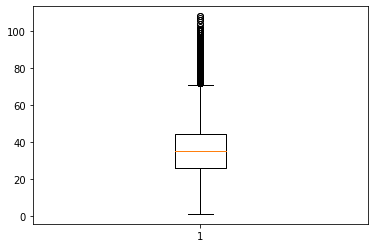

In [83]:
data_dict = plt.boxplot(data_cases2_nomissingage['age'])

In [84]:
data_dict # curly brackets

{'boxes': [<matplotlib.lines.Line2D at 0x7f80b34812d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f80b3492350>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f80b349b390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f80b3492e10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f80b3481890>,
  <matplotlib.lines.Line2D at 0x7f80b3481dd0>]}

In [85]:
data_dict['boxes']

In [86]:
data_dict['boxes'][0]

In [87]:
data_dict['boxes'][0].get_ydata()

array([26., 26., 44., 44., 26.])

In [88]:
Q1 = data_dict['boxes'][0].get_ydata()[0]
Q1

26.0

In [89]:
data_dict['fliers'][0].get_ydata()

array([ 74.,  73.,  73., ..., 106.,  78.,  72.])

In [90]:
data_dict['caps'][0].get_ydata()

array([1., 1.])

In [91]:
data_dict['caps'][0].get_ydata()[0]

1.0

In [92]:
data_dict['caps'][1].get_ydata()

array([71., 71.])

In [93]:
cap1 = data_cases2_nomissingage['age'] >= data_dict['caps'][0].get_ydata()[0]
cap2 = data_cases2_nomissingage['age'] <= data_dict['caps'][1].get_ydata()[0]

data_cases2_nomissingage_nooutlier = data_cases2_nomissingage[cap1 & cap2]
data_cases2_nomissingage_nooutlier

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1.0,12/1/2020,NaN,หญิง,61.000000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
3,4.0,22/1/2020,NaN,ชาย,68.000000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5.0,24/1/2020,NaN,หญิง,66.000000,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
5,6.0,25/1/2020,NaN,หญิง,33.000000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
6,7.0,26/1/2020,NaN,หญิง,57.000000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
543301,543302.0,28/7/2021,27/7/2021,ชาย,39.000000,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543302,543303.0,28/7/2021,27/7/2021,ชาย,37.000000,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543303,543304.0,28/7/2021,27/7/2021,ชาย,28.000000,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543304,543305.0,28/7/2021,27/7/2021,ชาย,26.000000,ปี,NaN,ปัตตานี,ทัณฑสถาน/เรือนจำ,ปัตตานี,NaN


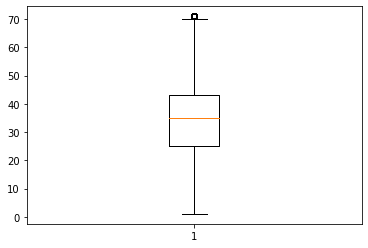

In [94]:
data_dict = plt.boxplot(data_cases2_nomissingage_nooutlier['age'])

ตัด outlier แบบ manual

In [95]:
data_cases2_nomissingage[data_cases2_nomissingage['province_of_onset'] != 'ลอง']

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1.0,12/1/2020,NaN,หญิง,61.000000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2.0,17/1/2020,NaN,หญิง,74.000000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3.0,22/1/2020,NaN,หญิง,73.000000,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4.0,22/1/2020,NaN,ชาย,68.000000,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5.0,24/1/2020,NaN,หญิง,66.000000,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
543301,543302.0,28/7/2021,27/7/2021,ชาย,39.000000,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543302,543303.0,28/7/2021,27/7/2021,ชาย,37.000000,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543303,543304.0,28/7/2021,27/7/2021,ชาย,28.000000,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543304,543305.0,28/7/2021,27/7/2021,ชาย,26.000000,ปี,NaN,ปัตตานี,ทัณฑสถาน/เรือนจำ,ปัตตานี,NaN


# Quiz 5

เขียนฟังก์ชั่น คำนวณ หา Q1,Q2,Q3,IQR,min,max โดยรับ input เป็น output ของ boxplot

```python
def box_vals(box_out_dict):
    #your code1
    .
    .
    .
    #your codex
    return q1,q2,q3,iqr,vmin,vmix
```


In [105]:
def box_vals(box_out_dict):
    ##ส่วนโค้ดหาค่าต่าง ๆ
    q1 = data_dict['boxes'][0].get_ydata()[0]
    q2 = data_dict['boxes'][0].get_ydata()[1]
    q3 = data_dict['boxes'][0].get_ydata()[2]
    iqr = q3 - q1
    vmin = min(data_dict['boxes'][0].get_ydata())
    vmax = max(data_dict['boxes'][0].get_ydata())
    ##ส่วนแสดงผล
    print(f'Q1 มีค่าเท่ากับ {q1}')
    print(f'Q2 มีค่าเท่ากับ {q2}')
    print(f'Q3 มีค่าเท่ากับ {q3}')
    print(f'IQR มีค่าเท่ากับ {iqr}')
    print(f'min มีค่าเท่ากับ {vmin}')
    print(f'max มีค่าเท่ากับ {vmax}')
   return ##q1,q2,q3,iqr,vmin,vmax

IndentationError: ignored

In [106]:
box_vals(data_dict)   ##print('ค่าของ Q1,Q2,Q3,IQR,vmin,vmax ตามลำดับ ดังนี้')

(25.0, 35.0, 43.0, 18.0, 1.0, 70.0)

แบบอาจารย์

In [107]:
def box_vals(box_out_dict):
    Q1 = box_out_dict['boxes'][0].get_ydata()[0] 
    Q2 = box_out_dict['medians'][0].get_ydata()[0]
    Q3 = box_out_dict['boxes'][0].get_ydata()[2]
    IQR =  Q3 - Q1
    vmin =  box_out_dict['caps'][0].get_ydata()[0]
    vmax =  box_out_dict['caps'][1].get_ydata()[0] 
    return Q1,Q2,Q3,IQR,vmin,vmax

In [108]:

box_vals(data_dict)

(25.0, 35.0, 43.0, 18.0, 1.0, 70.0)

In [109]:
data_dict['boxes'][0].get_xdata()

array([0.925, 1.075, 1.075, 0.925, 0.925])

Quiz กลุ่ม ||| แก้ให้ box_vals สามารถรับ input ที่ box plot วาดแบบแนวนอนได้ (vert=False)

In [110]:
def box_vals(box_out_dict, vert = True):
    if vert == True:
        Q1 = box_out_dict['boxes'][0].get_ydata()[0] 
        Q2 = box_out_dict['medians'][0].get_ydata()[0]
        Q3 = box_out_dict['boxes'][0].get_ydata()[2]
        IQR =  Q3 - Q1
        vmin =  box_out_dict['caps'][0].get_ydata()[0]
        vmax =  box_out_dict['caps'][1].get_ydata()[0] 
    else:
        Q1 = box_out_dict['boxes'][0].get_xdata()[0] 
        Q2 = box_out_dict['medians'][0].get_xdata()[0]
        Q3 = box_out_dict['boxes'][0].get_xdata()[2]
        IQR =  Q3 - Q1
        vmin =  box_out_dict['caps'][0].get_xdata()[0]
        vmax =  box_out_dict['caps'][1].get_xdata()[0] 

    ### code ###

    return Q1,Q2,Q3,IQR,vmin,vmax

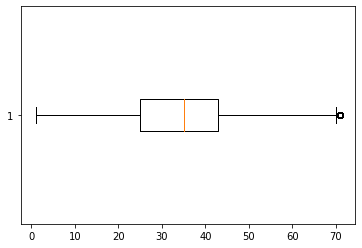

In [111]:
data_dict_x = plt.boxplot(data_cases2_nomissingage_nooutlier['age'],vert=False)

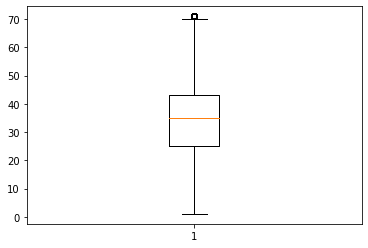

In [112]:
data_dict_y = plt.boxplot(data_cases2_nomissingage_nooutlier['age'])

In [113]:
box_vals(data_dict_y)

(25.0, 35.0, 43.0, 18.0, 1.0, 70.0)

In [114]:
box_vals(data_dict_x,vert=False)

(25.0, 35.0, 43.0, 18.0, 1.0, 70.0)

### Pandas' looping (.iterrows)

In [115]:
data_cut = data_cases2_nomissingage.iloc[:10,:]
data_cut

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1.0,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2.0,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3.0,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4.0,22/1/2020,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5.0,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
5,6.0,25/1/2020,NaN,หญิง,33.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
6,7.0,26/1/2020,NaN,หญิง,57.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
7,8.0,26/1/2020,NaN,หญิง,73.0,ปี,China,ประจวบคีรีขันธ์,คนต่างชาติเดินทางมาจากต่างประเทศ,ประจวบคีรีขันธ์,หัวหิน
8,9.0,28/1/2020,NaN,ชาย,63.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
9,10.0,28/1/2020,NaN,หญิง,28.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,นนทบุรี,NaN


In [116]:
for record in data_cut.iterrows():
    print(record[1]['province_of_isolation'])
    print('new row')

กรุงเทพมหานคร
new row
กรุงเทพมหานคร
new row
นครปฐม
new row
กรุงเทพมหานคร
new row
นนทบุรี
new row
กรุงเทพมหานคร
new row
กรุงเทพมหานคร
new row
ประจวบคีรีขันธ์
new row
กรุงเทพมหานคร
new row
นนทบุรี
new row


In [117]:
for index in range(data_cut.shape[0]):
    print(data_cut.iloc[index,7])
    print('new row')

กรุงเทพมหานคร
new row
กรุงเทพมหานคร
new row
นครปฐม
new row
กรุงเทพมหานคร
new row
นนทบุรี
new row
กรุงเทพมหานคร
new row
กรุงเทพมหานคร
new row
ประจวบคีรีขันธ์
new row
กรุงเทพมหานคร
new row
นนทบุรี
new row


# การรวมตาราง Data Integration (ต่อตารางในแนวแกน x)

In [118]:
os.path.join(path,'search_click.csv')

'/content/drive/My Drive/DWDM2021_DATA/search_click.csv'

In [119]:
search_click = pd.read_csv(os.path.join(path,'search_click.csv'))
w_restaurant = pd.read_csv(os.path.join(path,'w_restaurant.csv'))

In [120]:
search_click.head()

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2.222400e+15,True
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,4.608380e+14,True
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2.581490e+15,True
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1.404580e+15,True
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,9.333590e+14,True


In [121]:
search_click.shape

(1048575, 6)

In [122]:
print(w_restaurant.shape)
w_restaurant.head()

(246847, 32)


,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
0,2,นครินทร์ทันตกรรม,2,0,Samut Songkhram,75000,w4rh7g3,0,5.000000,NaN,NaN,1,0,3016,0,0,0,Orthodontic,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
1,4,Corner House,1,0,Bangkok Metropolitan Region,12150,w4rx73h,0,2.000000,NaN,NaN,1,0,321,0,0,1,Quick Meal,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,วัดโลกยสุธาราม,4,0,Phra Nakhon Si Ayutthaya,13000,w4x98jk,0,4.000000,NaN,1.0,0,0,167,0,0,0,Historical/Religion,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,นันท์คาราโอเกะ,1,0,Bangkok Metropolitan Region,10700,w4rqw9q,0,0.000000,NaN,NaN,0,0,901,0,0,0,Karaoke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,Buono Caffe,1,0,Bangkok Metropolitan Region,10220,w4rx4gd,0,3.738462,NaN,15.0,3,0,2360,1,0,2,Café/Coffee Shop,1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN


อยากได้ข้อมูลร้านค้าที่คนค้นหาล่าสุด 100 ร้าน 

In [123]:
search100 = search_click.iloc[-100:,:]
search100

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
1048475,19:00.5,1fd0b74a-5c6e-46c2-80ee-6254d5e979ae,63346.0,7,3.195878e+10,False
1048476,18:50.9,f2daaf36-3abd-4971-a13b-0abd1dabae23,317812.0,7,9.191297e+10,False
1048477,45:58.0,ef57982e-9e44-4916-a523-2335856f3a4c,144113.0,7,7.082640e+10,False
1048478,49:08.8,ef57982e-9e44-4916-a523-2335856f3a4c,144113.0,7,2.615840e+11,False
1048479,19:25.9,54eaa7da-5329-4a57-828d-42a3b52bbf89,155123.0,7,3.979521e+10,False
...,...,...,...,...,...,...
1048570,05:28.8,99aab616-6fc5-4fbf-994b-4aebee7bb360,278479.0,8,2.072630e+11,False
1048571,15:28.8,d70a2c5d-ee94-4e4c-9f7c-c5faac6db12a,321885.0,8,6.931413e+10,False
1048572,11:49.4,4c1de7fe-300e-41aa-9d01-914344fc3753,221035.0,8,3.105162e+10,False
1048573,10:33.7,2ec0ddec-e450-4b98-9779-42b77aa7eda5,220572.0,8,7.848904e+10,False


1.   รวม 2 ตารางเข้าด้วยกัน
2.   เลือกมาเฉพาะบาง column จากอีกตารางหนึ่งมาแปะไว้


### รวม 2 ตาราง (.merge())

In [124]:
merged_table = search100.merge(w_restaurant,how='left',left_on='business_id',right_on='id')
merged_table

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
0,19:00.5,1fd0b74a-5c6e-46c2-80ee-6254d5e979ae,63346.0,7,3.195878e+10,False,63346,บ้านหญิง อีสาน แอนด์ กริล,1,0,Bangkok Metropolitan Region,10330,w4rqpyd,0,3.755792,8.0,134.0,60,18,32406,71,17,71,North East,2.0,175.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18:50.9,f2daaf36-3abd-4971-a13b-0abd1dabae23,317812.0,7,9.191297e+10,False,317812,ไก่อากง,1,0,Bangkok Metropolitan Region,10400,w4rqrss,0,0.000000,NaN,NaN,0,0,513,0,0,0,Thai,3.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,45:58.0,ef57982e-9e44-4916-a523-2335856f3a4c,144113.0,7,7.082640e+10,False,144113,อร่อย@หัวหิน,1,0,Hua Hin,NaN,w4pp6dh,0,4.037497,NaN,2913.0,311,12,190409,264,0,148,Seafood,3.0,375.0,3.0,1.0,1.0,1.0,1.0,2018.0,1.0,5.0,NaN,NaN,NaN,NaN
3,49:08.8,ef57982e-9e44-4916-a523-2335856f3a4c,144113.0,7,2.615840e+11,False,144113,อร่อย@หัวหิน,1,0,Hua Hin,NaN,w4pp6dh,0,4.037497,NaN,2913.0,311,12,190409,264,0,148,Seafood,3.0,375.0,3.0,1.0,1.0,1.0,1.0,2018.0,1.0,5.0,NaN,NaN,NaN,NaN
4,19:25.9,54eaa7da-5329-4a57-828d-42a3b52bbf89,155123.0,7,3.979521e+10,False,155123,ชาไทยข่อลดา,1,0,Suphan Buri,72000,w4x4wqp,0,0.000000,NaN,1.0,0,2,240,0,0,0,Café/Coffee Shop,1.0,NaN,1.0,0.0,1.0,NaN,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,05:28.8,99aab616-6fc5-4fbf-994b-4aebee7bb360,278479.0,8,2.072630e+11,False,278479,เสกแจ่วฮ้อน,1,0,Chaiyaphum,NaN,w6b9cyk,0,4.000000,NaN,3.0,2,2,1599,0,0,0,Sukiyaki/Shabu,1.0,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,15:28.8,d70a2c5d-ee94-4e4c-9f7c-c5faac6db12a,321885.0,8,6.931413e+10,False,321885,ก๋วยเตี๋ยวหมูหน่อกะลา,1,0,Bangkok Metropolitan Region,11120,w4rrppd,0,4.000000,NaN,7.0,2,1,956,1,0,0,Noodles,1.0,NaN,3.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,11:49.4,4c1de7fe-300e-41aa-9d01-914344fc3753,221035.0,8,3.105162e+10,False,221035,Laemcharoen Seafood,1,0,Bangkok Metropolitan Region,12130,w4rx9de,0,3.830601,23.0,24.0,11,8,8977,7,8,4,Seafood,3.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
98,10:33.7,2ec0ddec-e450-4b98-9779-42b77aa7eda5,220572.0,8,7.848904e+10,False,220572,เอี่ยวไถ่ สุกี้โบราณ,1,0,Bangkok Metropolitan Region,11130,w4rqtcb,0,3.766129,12.0,153.0,58,12,37940,78,0,29,Sukiyaki/Shabu,3.0,NaN,3.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


### เลือกเฉพาะ column ที่ต้องการมาแปะ (.map())

In [125]:
search100['business_name'] = search100['business_id'].map(w_restaurant.set_index('id')['name'])
search100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads,business_name
1048475,19:00.5,1fd0b74a-5c6e-46c2-80ee-6254d5e979ae,63346.0,7,3.195878e+10,False,บ้านหญิง อีสาน แอนด์ กริล
1048476,18:50.9,f2daaf36-3abd-4971-a13b-0abd1dabae23,317812.0,7,9.191297e+10,False,ไก่อากง
1048477,45:58.0,ef57982e-9e44-4916-a523-2335856f3a4c,144113.0,7,7.082640e+10,False,อร่อย@หัวหิน
1048478,49:08.8,ef57982e-9e44-4916-a523-2335856f3a4c,144113.0,7,2.615840e+11,False,อร่อย@หัวหิน
1048479,19:25.9,54eaa7da-5329-4a57-828d-42a3b52bbf89,155123.0,7,3.979521e+10,False,ชาไทยข่อลดา
...,...,...,...,...,...,...,...
1048570,05:28.8,99aab616-6fc5-4fbf-994b-4aebee7bb360,278479.0,8,2.072630e+11,False,เสกแจ่วฮ้อน
1048571,15:28.8,d70a2c5d-ee94-4e4c-9f7c-c5faac6db12a,321885.0,8,6.931413e+10,False,ก๋วยเตี๋ยวหมูหน่อกะลา
1048572,11:49.4,4c1de7fe-300e-41aa-9d01-914344fc3753,221035.0,8,3.105162e+10,False,Laemcharoen Seafood
1048573,10:33.7,2ec0ddec-e450-4b98-9779-42b77aa7eda5,220572.0,8,7.848904e+10,False,เอี่ยวไถ่ สุกี้โบราณ


## \*ตารางรอง (ตารางข้างขวา) ต้องไม่มี index ซ้ำ\*

#### Project กลุ่ม #### 
* present วันที่ 31 สิงหาคม 2564
* ข้อมูลที่ไปดึงมาจาก 3 แหล่ง
* แสดงวิธีการโหลด
* ความเชื่อมโยงของ 3 ตาราง (index)



## Group by (pandas)

In [126]:
search100.groupby('business_id').count()

,click_timestamp,search_id,display_position,time_diff_nanos,ads,business_name
business_id,,,,,,
9640.0,1,1,1,1,1,1
11387.0,1,1,1,1,1,1
12133.0,1,1,1,1,1,1
44441.0,3,3,3,3,3,3
61441.0,4,4,4,4,4,4
...,...,...,...,...,...,...
321885.0,1,1,1,1,1,1
323374.0,1,1,1,1,1,1
331866.0,1,1,1,1,1,1


#### ร้านไหนมีคน click เข้าไปดูมากที่สุด โดยพิจารณาจาก การ search 100 ครั้งล่าสุด

In [127]:
search100.groupby('business_id').count().sort_values(by=['search_id'],ascending=False)

,click_timestamp,search_id,display_position,time_diff_nanos,ads,business_name
business_id,,,,,,
130270.0,5,5,5,5,5,5
61441.0,4,4,4,4,4,4
98956.0,4,4,4,4,4,4
109141.0,3,3,3,3,3,3
207208.0,3,3,3,3,3,3
...,...,...,...,...,...,...
196321.0,1,1,1,1,1,1
11387.0,1,1,1,1,1,1
204481.0,1,1,1,1,1,1


In [128]:
w_restaurant[w_restaurant['id']==130270]

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
83878,130270,Audrey Café,1,0,Bangkok Metropolitan Region,10900,w4rw871,0,3.789046,8.0,415.0,277,24,106839,177,16,136,Fusion Food,3.0,375.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN


### แต่ละจังหวัดมีอายุเฉลี่ยของคนที่ตรวจพบโรคเป็นกี่ปี

In [129]:
data_cases2

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1.0,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2.0,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3.0,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4.0,22/1/2020,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5.0,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
543301,543302.0,28/7/2021,27/7/2021,ชาย,39.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543302,543303.0,28/7/2021,27/7/2021,ชาย,37.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543303,543304.0,28/7/2021,27/7/2021,ชาย,28.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543304,543305.0,28/7/2021,27/7/2021,ชาย,26.0,ปี,NaN,ปัตตานี,ทัณฑสถาน/เรือนจำ,ปัตตานี,NaN


In [130]:
data_cases2.dropna(subset=['age']).groupby('province_of_onset').mean().sort_values(by=['age'])

,No.,age
province_of_onset,,
นครศรีีธรรมราช,378103.00,2.0
ปลายพระยา,378139.00,15.0
จ.ปัตตานี,342312.00,16.0
นาวัง,312748.00,19.0
สมทรสาคร,507280.00,19.0
...,...,...
ยานนาวา,384424.00,57.0
เมือง,401121.50,57.0
สมุุทรสงคราม,417892.75,58.0


HW + Quiz


1.   (จากตาราง w_restaurant กับ search_click) หา จังหวัดที่มีคนกดเข้าไปดูผลการ search 3 อันดับแรก
2.   (จากตาราง w_restaurant กับ search_click) เมืองไหนที่มีค่าเฉลี่ยของ 'weighted_average_rating' สูงที่สุด
3.   (จากตาราง confirmed-cases) เรียงลำดับ risk ที่ทีให้คนติดโรค 5 อันดับแรก
4.   (จากตาราง confirmed-cases) หาจังหวัดที่มีคนกักตัวมากที่สุด 10 อันดับแรก



In [131]:
HW1 = merged_table.groupby('city_name').count().sort_values(by=['search_id'],ascending=False)
HW1.iloc[:3,:1]

,click_timestamp
city_name,
Bangkok Metropolitan Region,83
Chon Buri,5
Hua Hin,2


In [132]:
HW2 = merged_table.groupby('city_name').mean().sort_values(['weighted_average_rating'],ascending=False)
HW2.iloc[:1,[8]]

,weighted_average_rating
city_name,
Chiang Mai,4.676923


In [133]:
HW3 = data_cases.groupby('risk').count().sort_values(by=['No.'],ascending=False)
HW3.iloc[:5,:1]

,No.
risk,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,194112
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,86442
อยู่ระหว่างการสอบสวน,65066
อื่นๆ,62543
ทัณฑสถาน/เรือนจำ,41778


In [134]:
HW4 = data_cases.groupby('province_of_isolation').count().sort_values(by=['No.'],ascending=False)
HW4.iloc[:10,:1]

,No.
province_of_isolation,
กรุงเทพมหานคร,168584
สมุทรสาคร,44611
สมุทรปราการ,37963
นนทบุรี,30393
ชลบุรี,24222
ปทุมธานี,19729
นครปฐม,11830
สงขลา,11639
เพชรบุรี,11494


### [PD] save ตารางเอาไปใช้ที่อื่น

In [135]:
HW3.to_csv('HW3.csv')

In [136]:
HW3.to_csv(os.path.join(path,'HW3.csv'))

### [PD]การสร้างตาราง


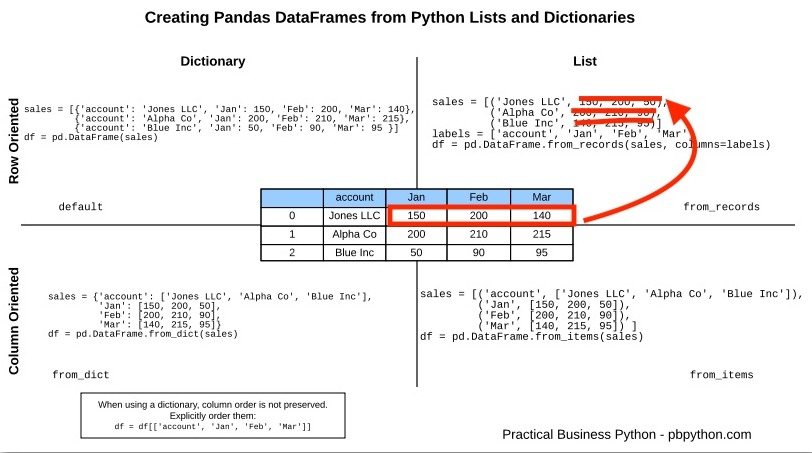

Ex1

In [137]:
sales = [{'account':'Jones LLC','Jan':150,'Feb':200,'Mar':140},
         {'account':'Alpha','Jan':200,'Feb':210,'Mar':215},
         {'account':'Blue Inc','Jan':50,'Feb':90,'Mar':95}]
sales

[{'Feb': 200, 'Jan': 150, 'Mar': 140, 'account': 'Jones LLC'},
 {'Feb': 210, 'Jan': 200, 'Mar': 215, 'account': 'Alpha'},
 {'Feb': 90, 'Jan': 50, 'Mar': 95, 'account': 'Blue Inc'}]

In [138]:
df1 = pd.DataFrame(sales)
df1

,account,Jan,Feb,Mar
0,Jones LLC,150,200,140
1,Alpha,200,210,215
2,Blue Inc,50,90,95


In [139]:
data = [['Jomes LLC',150,200,140],
        ['Alpha',200,210,215],
        ['Blue',50,90,95]]
headers = ['account','Jan','Feb','Mar']

df2 = pd.DataFrame.from_records(data,columns=headers)
df2

,account,Jan,Feb,Mar
0,Jomes LLC,150,200,140
1,Alpha,200,210,215
2,Blue,50,90,95
